In [3]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')


In [4]:
df=pd.read_csv('heart.csv')
df

,63,1,4,140,260,0,1.1,112,1.2,3,2,?,?.1,2.1
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [5]:
df.columns=['A','B','C','D','E','F','G','H','I','J','K','L','M','N']

In [6]:
df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N
0,44,1,4,130,209,0,1,127,0,0,?,?,?,0
1,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
2,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
3,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
4,66,1,3,120,0,0,1,120,0,-0.5,1,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,0,0,?,?,?,1
195,62,1,1,?,139,0,1,?,?,?,?,?,?,0
196,55,1,4,122,223,1,1,100,0,0,?,?,6,2
197,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [7]:
df.shape

(199, 14)

In [8]:
df.dtypes

A     int64
B     int64
C     int64
D    object
E    object
F    object
G     int64
H    object
I    object
J    object
K    object
L    object
M    object
N     int64
dtype: object

In [9]:
df.describe()

,A,B,C,G,N
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,0.733668,1.517588
std,7.827080,0.171433,0.796928,0.684918,1.222038
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [10]:
df.mean(axis=0)

A    59.331658
B     0.969849
C     3.502513
G     0.733668
N     1.517588
dtype: float64

In [11]:
df.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    0
G    0
H    0
I    0
J    0
K    0
L    0
M    0
N    0
dtype: int64

In [12]:
#DROPING THESE COLUMN AS LOTS OF DATA ARE MISSING
df.drop('L',axis=1,inplace=True)
df.drop('M',axis=1,inplace=True)
df.drop('K',axis=1,inplace=True)
df.drop('J',axis=1,inplace=True)
df.drop('I',axis=1,inplace=True)

In [13]:
df

,A,B,C,D,E,F,G,H,N
0,44,1,4,130,209,0,1,127,0
1,60,1,4,132,218,0,1,140,2
2,55,1,4,142,228,0,1,149,1
3,66,1,3,110,213,1,2,99,0
4,66,1,3,120,0,0,1,120,0
...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,1
195,62,1,1,?,139,0,1,?,0
196,55,1,4,122,223,1,1,100,2
197,58,1,4,?,385,1,2,?,0


In [14]:
df=df.replace('?',np.nan)


In [15]:
df

,A,B,C,D,E,F,G,H,N
0,44,1,4,130,209,0,1,127,0
1,60,1,4,132,218,0,1,140,2
2,55,1,4,142,228,0,1,149,1
3,66,1,3,110,213,1,2,99,0
4,66,1,3,120,0,0,1,120,0
...,...,...,...,...,...,...,...,...,...
194,54,0,4,127,333,1,1,154,1
195,62,1,1,NaN,139,0,1,NaN,0
196,55,1,4,122,223,1,1,100,2
197,58,1,4,NaN,385,1,2,NaN,0


In [16]:
df.isnull().sum()

A     0
B     0
C     0
D    56
E     7
F     7
G     0
H    53
N     0
dtype: int64

In [17]:
df[['D','H','E','F']] = df[['D','H','E','F']].apply(pd.to_numeric) 
df['D']=df['D'].replace(np.nan,df['D'].mean())
df['H']=df['H'].replace(np.nan,df['H'].mean())
df['E']=df['E'].replace(np.nan,df['E'].mean())

In [18]:
df

,A,B,C,D,E,F,G,H,N
0,44,1,4,130.00000,209.0,0.0,1,127.000000,0
1,60,1,4,132.00000,218.0,0.0,1,140.000000,2
2,55,1,4,142.00000,228.0,0.0,1,149.000000,1
3,66,1,3,110.00000,213.0,1.0,2,99.000000,0
4,66,1,3,120.00000,0.0,0.0,1,120.000000,0
...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.00000,333.0,1.0,1,154.000000,1
195,62,1,1,133.72028,139.0,0.0,1,122.869863,0
196,55,1,4,122.00000,223.0,1.0,1,100.000000,2
197,58,1,4,133.72028,385.0,1.0,2,122.869863,0


In [19]:
df.isnull().sum()

A    0
B    0
C    0
D    0
E    0
F    7
G    0
H    0
N    0
dtype: int64

In [20]:
df['F'].fillna(df['F'].mode().values[0],inplace=True)

In [21]:
df

,A,B,C,D,E,F,G,H,N
0,44,1,4,130.00000,209.0,0.0,1,127.000000,0
1,60,1,4,132.00000,218.0,0.0,1,140.000000,2
2,55,1,4,142.00000,228.0,0.0,1,149.000000,1
3,66,1,3,110.00000,213.0,1.0,2,99.000000,0
4,66,1,3,120.00000,0.0,0.0,1,120.000000,0
...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.00000,333.0,1.0,1,154.000000,1
195,62,1,1,133.72028,139.0,0.0,1,122.869863,0
196,55,1,4,122.00000,223.0,1.0,1,100.000000,2
197,58,1,4,133.72028,385.0,1.0,2,122.869863,0


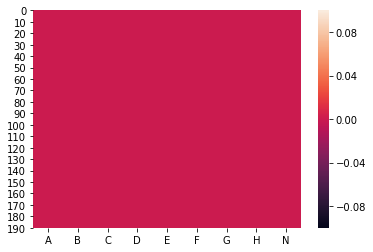

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.describe()

,A,B,C,D,E,F,G,H,N
count,199.000000,199.000000,199.000000,199.00000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,133.72028,178.322917,0.341709,0.733668,122.869863,1.517588
std,7.827080,0.171433,0.796928,18.29815,112.144792,0.475479,0.684918,18.867497,1.222038
min,35.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,69.000000,0.000000
25%,55.000000,1.000000,3.000000,125.50000,119.500000,0.000000,0.000000,112.000000,0.000000
50%,60.000000,1.000000,4.000000,133.72028,214.000000,0.000000,1.000000,122.869863,1.000000
75%,64.000000,1.000000,4.000000,140.00000,254.000000,1.000000,1.000000,130.000000,3.000000
max,77.000000,1.000000,4.000000,190.00000,458.000000,1.000000,2.000000,180.000000,4.000000


A       AxesSubplot(0.125,0.657941;0.227941x0.222059)
B    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
C    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
D       AxesSubplot(0.125,0.391471;0.227941x0.222059)
E    AxesSubplot(0.398529,0.391471;0.227941x0.222059)
F    AxesSubplot(0.672059,0.391471;0.227941x0.222059)
G          AxesSubplot(0.125,0.125;0.227941x0.222059)
H       AxesSubplot(0.398529,0.125;0.227941x0.222059)
N       AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

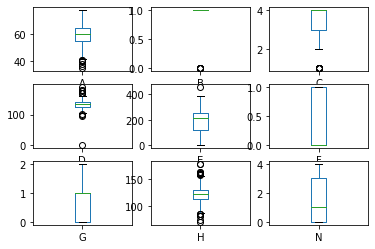

In [24]:
df.plot(kind='box',subplots=True, layout=(3,3))

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.96373685, 0.17631813, 0.62583065, ..., 0.38983236, 0.2194543 ,
        1.24498245],
       [0.08560374, 0.17631813, 0.62583065, ..., 0.38983236, 0.91020764,
        0.39575601],
       [0.5548152 , 0.17631813, 0.62583065, ..., 0.38983236, 1.3884215 ,
        0.42461322],
       ...,
       [0.5548152 , 0.17631813, 0.62583065, ..., 0.38983236, 1.21518725,
        0.39575601],
       [0.17056384, 0.17631813, 0.62583065, ..., 1.85354255, 0.        ,
        1.24498245],
       [0.34177131, 0.17631813, 1.89013499, ..., 1.85354255, 1.58713136,
        0.42461322]])

In [26]:
df_new=df[(z<3).all(axis=1)] #removing outlier

In [27]:
df_new

,A,B,C,D,E,F,G,H,N
0,44,1,4,130.00000,209.0,0.0,1,127.000000,0
1,60,1,4,132.00000,218.0,0.0,1,140.000000,2
2,55,1,4,142.00000,228.0,0.0,1,149.000000,1
3,66,1,3,110.00000,213.0,1.0,2,99.000000,0
4,66,1,3,120.00000,0.0,0.0,1,120.000000,0
...,...,...,...,...,...,...,...,...,...
192,62,1,4,158.00000,170.0,0.0,1,138.000000,1
193,46,1,4,134.00000,310.0,0.0,0,126.000000,2
196,55,1,4,122.00000,223.0,1.0,1,100.000000,2
197,58,1,4,133.72028,385.0,1.0,2,122.869863,0


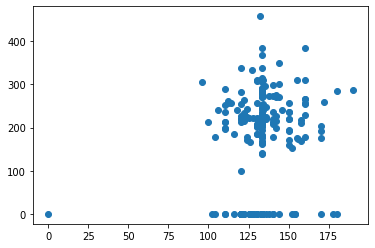

In [28]:
plt.scatter(df['D'],df['E'])

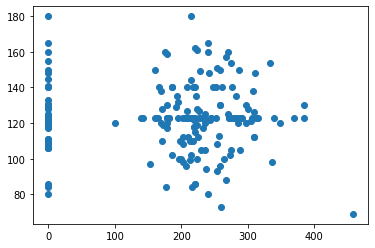

In [29]:
plt.scatter(df['E'],df['H'])

In [30]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [31]:
x=df_new.iloc[:,0:8]

In [32]:
x = scale.fit_transform(x)
x

array([[0.175     , 0.        , 1.        , ..., 0.        , 0.5       ,
        0.60416667],
       [0.575     , 0.        , 1.        , ..., 0.        , 0.5       ,
        0.73958333],
       [0.45      , 0.        , 1.        , ..., 0.        , 0.5       ,
        0.83333333],
       ...,
       [0.45      , 0.        , 1.        , ..., 1.        , 0.5       ,
        0.32291667],
       [0.525     , 0.        , 1.        , ..., 1.        , 1.        ,
        0.56114441],
       [0.625     , 0.        , 0.        , ..., 0.        , 1.        ,
        0.25      ]])

In [33]:
y=df_new.iloc[:,8].values

In [34]:
y

array([0, 2, 1, 0, 0, 3, 0, 3, 1, 0, 1, 1, 1, 1, 0, 4, 1, 0, 0, 2, 1, 3,
       0, 2, 2, 1, 1, 3, 3, 3, 3, 2, 3, 2, 0, 1, 0, 3, 1, 3, 0, 4, 2, 1,
       0, 2, 0, 1, 2, 0, 1, 2, 2, 3, 0, 1, 0, 2, 1, 4, 2, 2, 1, 1, 1, 2,
       3, 3, 1, 3, 2, 0, 2, 2, 2, 4, 2, 3, 0, 1, 1, 3, 0, 3, 1, 0, 3, 1,
       0, 1, 3, 1, 1, 0, 3, 1, 1, 0, 0, 3, 0, 3, 1, 1, 3, 2, 2, 3, 1, 2,
       3, 1, 0, 1, 4, 2, 0, 1, 1, 3, 0, 3, 0, 2, 0, 4, 2, 4, 0, 0, 0, 1,
       3, 3, 0, 3, 1, 1, 2, 2, 2, 2, 2, 1, 4, 3, 3, 3, 1, 3, 2, 0, 2, 1,
       1, 0, 3, 1, 0, 0, 2, 3, 1, 1, 0, 1, 1, 0, 1, 3, 2, 2, 0, 4, 3, 1,
       2, 2, 0, 1])

In [35]:
y=y.reshape(-1,1)

In [36]:
y

array([[0],
       [2],
       [1],
       [0],
       [0],
       [3],
       [0],
       [3],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [4],
       [1],
       [0],
       [0],
       [2],
       [1],
       [3],
       [0],
       [2],
       [2],
       [1],
       [1],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3],
       [2],
       [0],
       [1],
       [0],
       [3],
       [1],
       [3],
       [0],
       [4],
       [2],
       [1],
       [0],
       [2],
       [0],
       [1],
       [2],
       [0],
       [1],
       [2],
       [2],
       [3],
       [0],
       [1],
       [0],
       [2],
       [1],
       [4],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [3],
       [3],
       [1],
       [3],
       [2],
       [0],
       [2],
       [2],
       [2],
       [4],
       [2],
       [3],
       [0],
       [1],
       [1],
       [3],
       [0],
    

In [37]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=50)

In [38]:
x_train.shape

(144, 8)

In [39]:
y_train.shape

(144, 1)

In [40]:
x_test.shape

(36, 8)

In [41]:
y_test.shape

(36, 1)

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [43]:
model=[MultinomialNB(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier()]

In [44]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    mscores= cross_val_score(m,x,y,cv=5)
    print(mscores)
    print(mscores.mean(),mscores.std())
    print('\n')
    
    

0.2777777777777778
[[ 1  7  0  0  0]
 [ 1  9  0  0  0]
 [ 0 10  0  0  0]
 [ 0  6  0  0  0]
 [ 0  2  0  0  0]]
              precision    recall  f1-score   support

           0       0.50      0.12      0.20         8
           1       0.26      0.90      0.41        10
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         2

    accuracy                           0.28        36
   macro avg       0.15      0.20      0.12        36
weighted avg       0.18      0.28      0.16        36

[0.31578947 0.26315789 0.24324324 0.35294118 0.3030303 ]
0.29563241823303743 0.0388446899513474


0.2777777777777778
[[ 0  8  0  0  0]
 [ 0 10  0  0  0]
 [ 0 10  0  0  0]
 [ 0  6  0  0  0]
 [ 0  2  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.28      1.00      0.43        10
           2       0.00      0